In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy =True

In [5]:
con = sa.create_engine('sqlite:///../DATOS/airbnb2.db')

In [9]:
df = pd.read_sql('df',con=con)
df.head()

,index,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,0,6369,"Rooftop terrace room , ensuite bathroom",Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,...,t,2,1.0,1.0,80,4.87,4.89,4.77,5534,Chamartín
1,1,21853,Bright and airy room,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,...,f,1,1.0,1.0,33,4.58,4.82,4.21,2404,Latina
2,2,23001,Apartmento Arganzuela- Madrid Rio,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,...,f,6,3.0,5.0,0,NaN,NaN,NaN,4282,Arganzuela
3,3,24805,Gran Via Studio Madrid,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,...,f,3,1.0,1.0,12,4.92,5.00,5.00,5171,Centro
4,4,26825,Single Room whith private Bathroom,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,...,f,1,1.0,1.0,149,4.68,4.71,4.70,4282,Arganzuela


In [ ]:
#Variables de analisis mas importantes,vamos a trabajar con los KPIS con los cuales vamos a operar esas palancas
#precio sobre el tipo de habitacion, dependiendo del tipo el precio es diferente
#tenemos que calcular el precio_total de alquiler total, nº habitaciones  * precio

In [10]:
#Como saber si el precio que viene es un precio por habitacion o precio total?
#agrupando por el tipo de alquiler y el precio medio (tambien interviene el distrito)
#1 conteo de immuebles por distrito
df.distrito.value_counts()


Centro                   8127
Salamanca                1218
Chamberí                 1089
Arganzuela               1005
Tetuán                    762
Retiro                    618
Carabanchel               581
Chamartín                 538
Ciudad Lineal             532
Moncloa - Aravaca         493
Puente de Vallecas        465
San Blas - Canillejas     463
Latina                    455
Hortaleza                 354
Fuencarral - El Pardo     265
Usera                     233
Barajas                   142
Villaverde                129
Moratalaz                  94
Villa de Vallecas          90
Vicálvaro                  57
Name: distrito, dtype: int64

In [12]:
#mayor tamaño muestral es en el distrito
#2
df.loc[df.distrito == 'Centro',:].groupby('room_type').price.mean()
#hay diferencia entre alquilar todo el home y 1 habitacion privada

room_type
Entire home/apt    148.859980
Private room        67.131643
Shared room         60.464286
Name: price, dtype: float64

In [21]:
#los apartamentos que tienen varias habitaciones que % de ellas esta alquilando todo el tiempo?
#queremos homogeneizar independientemente de cual sea el tipo de alquiler, tener 1 precio para cada registro, que nos diga
#el potencial de ingresos que nos puede dar ese immueble cuando lo tenemos alquilado
def crear_precio_total(registro):
    #calcula la formula solo si pasa esto
    if (registro.beds > 1 ) & ((registro.room_type == 'Private room') | (registro.room_type == 'Shared room')):
        salida = (registro.price * registro.beds) * 0.7
    else:
        salida = registro.price
        
    return (salida)
        
df['precio_total'] = df.apply(crear_precio_total, axis = 1)    

In [22]:
#comprobacion con ejemplos 
#para 1hab el alquiler equivale al precio de 1 cama
#para una private room si aplica la formula mirar registro 13
#para todo el apartamento el precio total es el precio inicial
df[['room_type','price','beds','precio_total']].head(30)
#COn estos datos si podemos hacer la comparacion precios por barrios, tipo de alquiler habitaciones etc..
#ahora esta en la misma unidad
#habia registros que estaban en la unidad de precio * todo el immueble
#y habia registros que estaban en la unidad de precio * habitacion

,room_type,price,beds,precio_total
0,Private room,60,1.0,60.0
1,Private room,31,1.0,31.0
2,Entire home/apt,50,5.0,50.0
3,Entire home/apt,92,1.0,92.0
4,Private room,26,1.0,26.0
5,Entire home/apt,85,3.0,85.0
6,Entire home/apt,65,2.0,65.0
7,Entire home/apt,54,1.0,54.0
8,Entire home/apt,1400,3.0,1400.0
9,Entire home/apt,81,2.0,81.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           17710 non-null  int64  
 1   id                              17710 non-null  int64  
 2   name                            17707 non-null  object 
 3   host_name                       17685 non-null  object 
 4   neighbourhood_group             17710 non-null  object 
 5   neighbourhood                   17710 non-null  object 
 6   latitude                        17710 non-null  float64
 7   longitude                       17710 non-null  float64
 8   room_type                       17710 non-null  object 
 9   price                           17710 non-null  int64  
 10  minimum_nights                  17710 non-null  int64  
 11  calculated_host_listings_count  17710 non-null  int64  
 12  availability_365                

In [24]:
#esto significa la disponibilidad de alquiler de ese immueble en 365 dias
df.availability_365.head()

0    180
1    364
2    222
3    115
4    349
Name: availability_365, dtype: int64

In [28]:
#Calculando la ocupacion, el ratio de ocupacion
df['ocupacion'] = (((365- df.availability_365 ) /365) *100).astype('int64')
#contrastamos
df[['availability_365','ocupacion']]

,availability_365,ocupacion
0,180,50
1,364,0
2,222,39
3,115,68
4,349,4
...,...,...
17705,358,1
17706,358,1
17707,358,1
17708,358,1


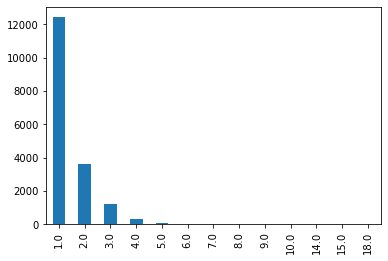

In [31]:
#Discretizacion de variables, para pasarlas de continuas a categoricas
df.bedrooms.value_counts().plot.bar();
#+12k 1hab
#3.5k 2hab

In [32]:
condiciones = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms > 3]
resultados = ['01_Una','02_Dos','03_Tres','04_Cuatro_o_mas']
df['bedrooms_disc'] = np.select(condiciones, resultados, default = -999)
df['bedrooms_disc'].value_counts()

01_Una             12422
02_Dos              3617
03_Tres             1228
04_Cuatro_o_mas      443
Name: bedrooms_disc, dtype: int64

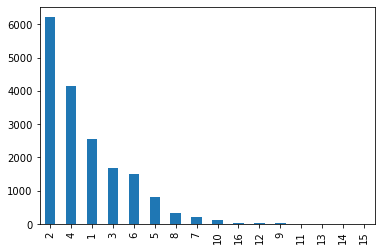

In [34]:
df.accommodates.value_counts().plot.bar();

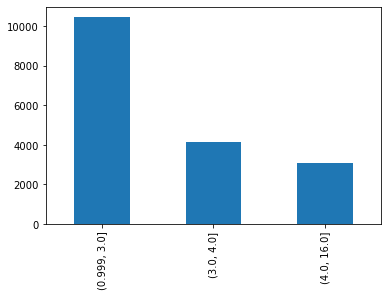

In [36]:
pd.qcut(df.accommodates,[0,0.5,0.8,1]).value_counts().plot.bar();

In [38]:
df['accommodates_disc'] = pd.qcut(df.accommodates,[0,0.5,0.8,1],
       labels = ['0-2','3','4-16'])

<AxesSubplot:>

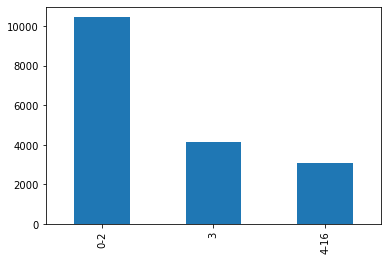

In [39]:
df['accommodates_disc'].value_counts().plot.bar();

<AxesSubplot:>

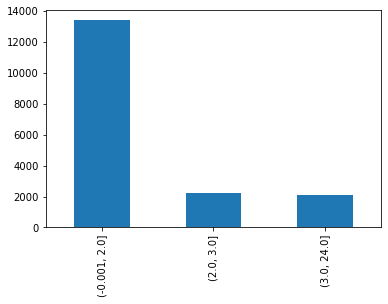

In [40]:
pd.qcut(df.beds,[0,0.5,0.8,1]).value_counts().plot.bar()

In [43]:
df['beds_disc'] = pd.qcut(df.beds,[0,0.5,0.8,1],
       labels = ['1','2','3-23'])

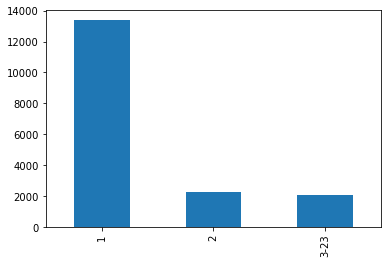

In [44]:
df['beds_disc'].value_counts().plot.bar();

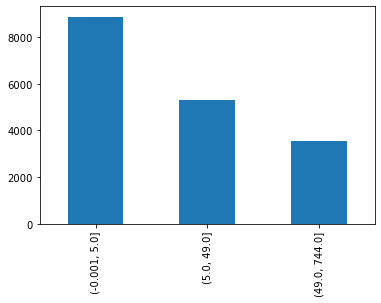

In [45]:
pd.qcut(df.number_of_reviews,[0,0.5,0.8,1]).value_counts().plot.bar();

In [46]:
df['number_of_reviews_disc'] = pd.qcut(df.number_of_reviews,[0,0.5,0.8,1],
                                      labels = ['0-4','5-48','49-743'])

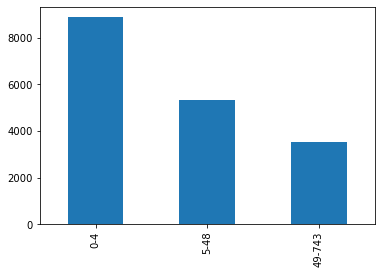

In [48]:
df['number_of_reviews_disc'].value_counts().plot.bar();

In [50]:
#Estimando el precio de la compra, primer hay que estimar el tamaño del piso a partir del nº de habitaciones 
#1hab 50m2, 2hab 70m2, 3hab 90m2, 4hab 120m2, 5+hab 150m2 (datos random)
condiciones = [df.bedrooms == 1,
            df.bedrooms == 2,
            df.bedrooms == 3,
            df.bedrooms == 4,
            df.bedrooms >4]
resultados =[50,70,90,120,150]
df['m2_immueble'] = np.select(condiciones,resultados,default = -999)

In [51]:
df['m2_immueble'].value_counts()

50     12422
70      3617
90      1228
120      296
150      147
Name: m2_immueble, dtype: int64

In [52]:
df['precio_compra'] = df['m2_immueble'] * df['precio_m2'] *0.7

In [54]:
df[['bedrooms','m2_immueble','distrito','precio_m2','precio_compra']].head(20)

,bedrooms,m2_immueble,distrito,precio_m2,precio_compra
0,1.0,50,Chamartín,5534,193690.0
1,1.0,50,Latina,2404,84140.0
2,3.0,90,Arganzuela,4282,269766.0
3,1.0,50,Centro,5171,180985.0
4,1.0,50,Arganzuela,4282,149870.0
5,3.0,90,Arganzuela,4282,269766.0
6,1.0,50,Centro,5171,180985.0
7,1.0,50,Centro,5171,180985.0
8,2.0,70,Centro,5171,253379.0
9,1.0,50,Centro,5171,180985.0


In [56]:
#-pdi Puerta del Sol
lat1 = 40.4167278 
lon1 = -3.7033387 
from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 #En km, si usas millas tienes que cambiarlo por 3959.87433

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

df['pdi_Sol'] = df.apply(lambda registro:haversine(lat1,lon1,registro.latitude,registro.longitude), axis = 1)

In [59]:
df.groupby('distrito').pdi_Sol.mean().sort_values()

distrito
Centro                    0.730611
Arganzuela                1.939114
Chamberí                  2.133167
Retiro                    2.450593
Salamanca                 2.715975
Moncloa - Aravaca         3.294526
Usera                     3.928874
Latina                    3.942634
Carabanchel               3.970238
Chamartín                 4.432842
Puente de Vallecas        4.481127
Tetuán                    4.624605
Moratalaz                 5.073901
Ciudad Lineal             5.231293
Villaverde                7.664192
Fuencarral - El Pardo     8.062301
Hortaleza                 8.074184
San Blas - Canillejas     8.199011
Vicálvaro                 8.599559
Villa de Vallecas         9.176618
Barajas                  11.439064
Name: pdi_Sol, dtype: float64

In [60]:
df.to_sql('df_preparado',con =con , if_exists = 'replace')

17710